### Time series prediction of NYC taxi´s demand using Meta prophet

1. Importacion de las librerias utilizadas:

In [3]:
import db
import pandas as pd
import datetime as dt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot
from prophet import Prophet as ph
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
data = db.conn()

2. Lectura de datos de entrada y determinación de fechas de inico y fin de la muestra:

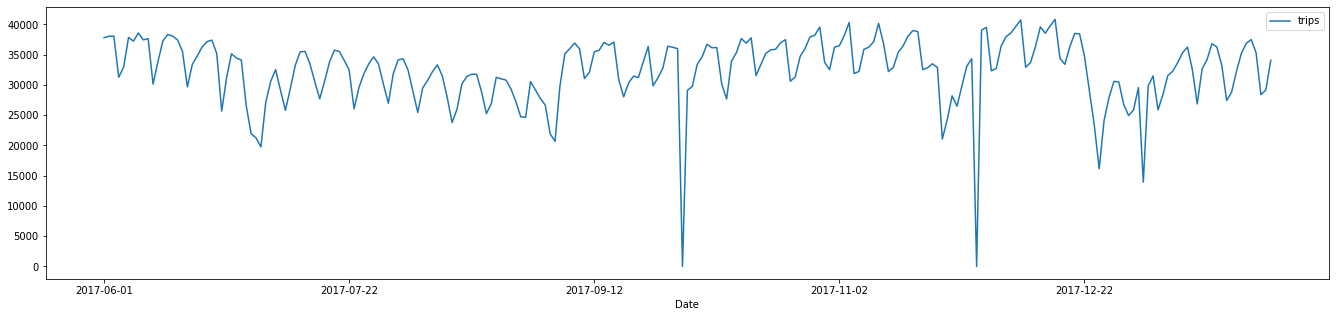

In [33]:
data = pd.read_csv("trips_day.csv")
data = data.drop("Unnamed: 0", axis=1)

end = "2017-06-01"
start = "2018-01-30"

data.plot(y = 'trips', x = "Date", figsize=(23,5))
pyplot.show()

3. Entrenamiento del modelo:

In [34]:
data = data.rename(columns={'Date': 'ds'})
data = data.rename(columns={'trips': 'y'})

model = ph()
model.fit(data)

16:41:23 - cmdstanpy - INFO - Chain [1] start processing
16:41:23 - cmdstanpy - INFO - Chain [1] done processing


4. Predicciones realizas por el modelo:

In [35]:
future_dates = model.make_future_dataframe(periods=30)
future = model.predict(future_dates)

future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
259,2018-02-20,32954.892533,26317.607595,38986.061162
260,2018-02-21,34630.871807,28054.182274,40968.276502
261,2018-02-22,33822.878558,27557.788856,39990.702196
262,2018-02-23,35351.127820,29250.385673,41589.914144
263,2018-02-24,33216.782285,27179.404765,39769.525209
264,2018-02-25,28925.112240,22438.851180,35140.821720
265,2018-02-26,29633.193813,23241.049200,35629.328686
266,2018-02-27,32975.523329,25897.772739,39641.005804
267,2018-02-28,34651.502603,28053.181844,41434.876397
268,2018-03-01,33843.509354,27883.149765,40277.207075


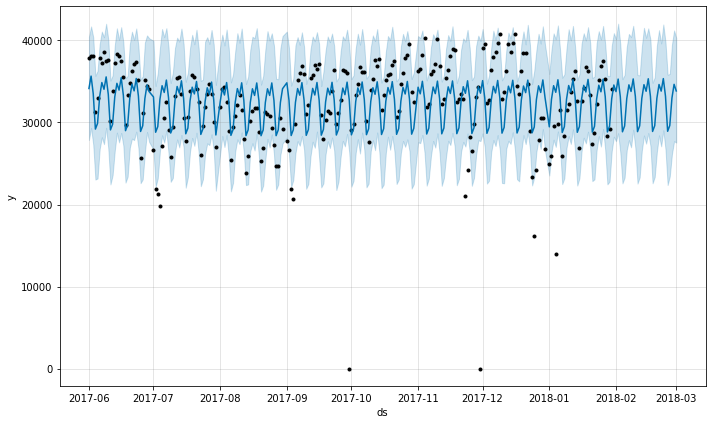

In [18]:
fig2 = model.plot(future)

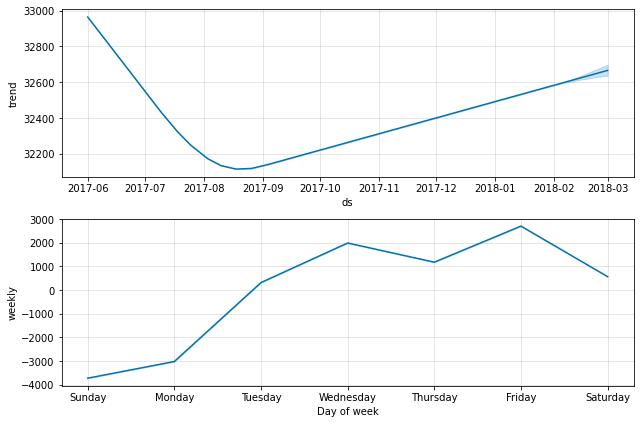

In [19]:
fig3 = model.plot_components(future)

In [20]:
plot_plotly(model, future)